### Libraries

In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import reset_ramsey
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import f as f_dist
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats

### Lấy dữ liệu của Audi

In [434]:
df = pd.read_csv("C:\\Users\\ACER\\Desktop\\ktl\\dataset\\audi.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


### Thông tin về data

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [436]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


### Loại bỏ dữ liệu thiếu, lỗi, trùng lặp

In [437]:
print(df.isna().sum())
print(df.isnull().sum())
df.drop_duplicates()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


### Bỏ EngineSize = 0

In [438]:
df = df[df.engineSize != 0]
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


### Chỉ lấy các năm trên 2010 đến hết để dự đoán giá hiện tại chính xác hơn

In [439]:
df['year'] = df['year'].astype(int) # Chuyển đổi kiểu dữ liệu sang int
df = df[(df['year'] >= 2010) & (df['year'] <= 2020)]
print(df['year'].unique())  # Xem các giá trị duy nhất

[2017 2016 2019 2015 2014 2018 2013 2020 2012 2010 2011]


### Lọc dữ liệu chỉ lấy top 10 model có số lần xuất hiện cao nhất

In [440]:
print(df['model'].unique())
print(len(df['model'].unique()))  # Đếm số lượng giá trị duy nhất trong cột 'model'


[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 'A1' ' S5' ' RS7']
26


In [441]:
# Xóa khoảng trắng trong cột 'model' và chuẩn hóa
df['model'] = df['model'].astype(str)
df['model'] = df['model'].str.strip().str.replace(' ', '')

# Bước 1: Tính tần số xuất hiện của từng giá trị trong cột 'model'
value_counts = df['model'].value_counts()

# Bước 2: Lấy 10 giá trị có tần số cao nhất
top_10_values = value_counts.head(10).index.tolist()

# Bước 3: Lọc DataFrame, chỉ giữ lại các dòng có giá trị 'model' nằm trong top 10
df = df[df['model'].isin(top_10_values)]
print(top_10_values)

['A3', 'Q3', 'A4', 'A1', 'A5', 'Q5', 'Q2', 'A6', 'Q7', 'TT']


C:\Users\ACER\AppData\Local\Temp\ipykernel_4736\3504559096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].astype(str)
C:\Users\ACER\AppData\Local\Temp\ipykernel_4736\3504559096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].str.strip().str.replace(' ', '')


### Xử lí outlier

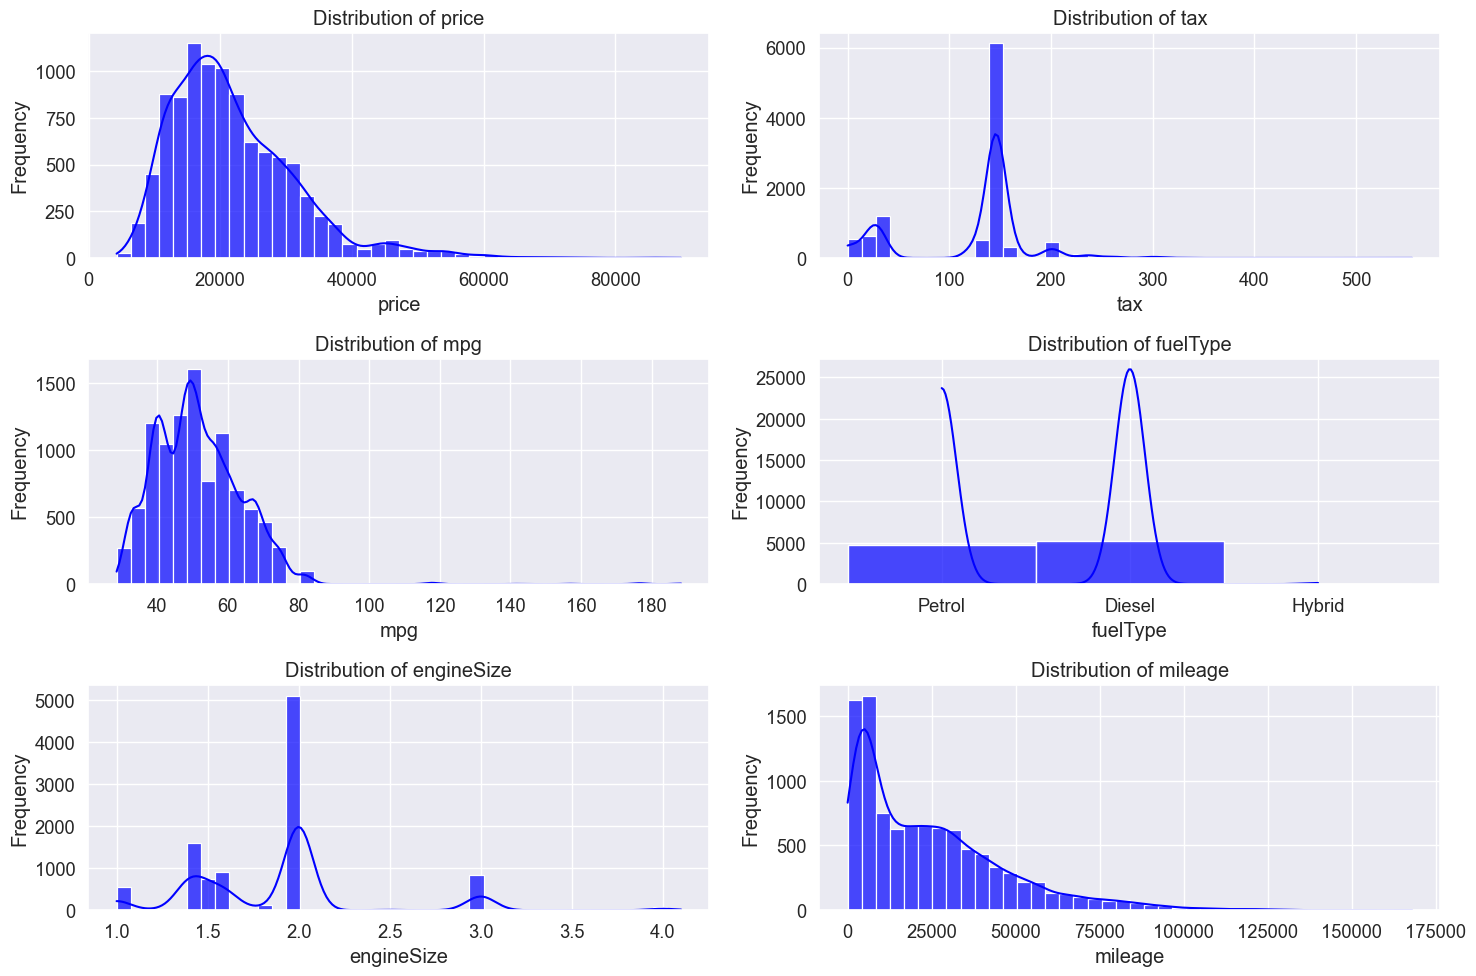

In [442]:
columns_to_plot = ['price','tax', 'mpg', 'fuelType', 'engineSize', 'mileage']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  # Sắp xếp thành lưới 3x2
    sns.histplot(df[column], kde=True, bins=40, color='blue', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [443]:
import pandas as pd
import numpy as np

# Hàm tính độ lệch thủ công (chính xác)
def calculate_skewness_manual(data):
    n = len(data)
    if n < 3:
        return np.nan
    mean = np.sum(data) / n
    squared_diff_sum = np.sum((data - mean) ** 2)
    std = np.sqrt(squared_diff_sum / (n - 1))
    if std == 0:
        return np.nan
    standardized = (data - mean) / std
    sum_cubed_deviations = np.sum(standardized ** 3)
    skewness = (n / ((n - 1) * (n - 2))) * sum_cubed_deviations
    return skewness

# Hàm phân loại mức độ lệch
def classify_skewness(skewness):
    if pd.isna(skewness):
        return "Không xác định (NaN)"
    abs_skewness = abs(skewness)
    if abs_skewness < 0.5:
        return "Yếu"
    elif 0.5 <= abs_skewness <= 1.0:
        return "Vừa"
    else:
        return "Mạnh"

# Hàm tìm outlier bằng IQR (chỉ để phát hiện, không thay thế)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Hàm tìm outlier bằng MAD (chỉ để phát hiện, không thay thế)
def detect_outliers_mad(data, column, k=3):
    median = data[column].median()
    mad_value = np.median(np.abs(data[column] - median)) * 1.4826
    lower_bound = median - k * mad_value
    upper_bound = median + k * mad_value
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Hàm tìm outlier bằng Log + IQR (chỉ để phát hiện, không thay thế)
def detect_outliers_log_iqr(data, column):
    # Tạo bản sao để không thay đổi dữ liệu gốc
    data_copy = data.copy()
    
    # Kiểm tra giá trị 0 hoặc âm
    if (data_copy[column] <= 0).any():
        min_positive = data_copy[column][data_copy[column] > 0].min() if (data_copy[column] > 0).any() else 1e-6
        data_copy.loc[data_copy[column] <= 0, column] = min_positive / 2
    
    # Áp dụng biến đổi log
    data_copy[column] = np.log1p(data_copy[column])
    
    # Tính IQR trên dữ liệu đã biến đổi log
    Q1 = data_copy[column].quantile(0.25)
    Q3 = data_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound_log = Q1 - 1.5 * IQR
    upper_bound_log = Q3 + 1.5 * IQR
    
    # Xác định outliers trên thang logarit
    outliers = data_copy[(data_copy[column] < lower_bound_log) | (data_copy[column] > upper_bound_log)]
    
    # Chuyển ngược lại để lấy ngưỡng trên thang gốc
    lower_bound = np.expm1(lower_bound_log)
    upper_bound = np.expm1(upper_bound_log)
    
    # Xác định outliers trên dữ liệu gốc
    outliers_original = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers_original, lower_bound, upper_bound

# Hàm thay thế outlier bằng IQR (cho toàn bộ dữ liệu)
def process_outliers_iqr_global(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data.loc[data[column] < lower_bound, column] = lower_bound
    data.loc[data[column] > upper_bound, column] = upper_bound
    return data

# Hàm thay thế outlier bằng MAD (cho toàn bộ dữ liệu)
def process_outliers_mad_global(data, column, k=3):
    median = data[column].median()
    mad_value = np.median(np.abs(data[column] - median)) * 1.4826
    lower_bound = median - k * mad_value
    upper_bound = median + k * mad_value
    data.loc[data[column] < lower_bound, column] = lower_bound
    data.loc[data[column] > upper_bound, column] = upper_bound
    return data

# Hàm xử lý Log + IQR cho lệch vừa (cho toàn bộ dữ liệu)
def process_outliers_log_iqr_global(data, column):
    # Kiểm tra giá trị 0 hoặc âm
    if (data[column] <= 0).any():
        min_positive = data[column][data[column] > 0].min() if (data[column] > 0).any() else 1e-6
        data.loc[data[column] <= 0, column] = min_positive / 2
    
    # Áp dụng biến đổi log
    data[column] = np.log1p(data[column])
    
    # Tính IQR và thay thế outliers
    data = process_outliers_iqr_global(data, column)
    
    # Chuyển ngược lại từ log
    data[column] = np.expm1(data[column])
    
    # Điều chỉnh lại các giá trị gần 0
    data.loc[data[column] < 1e-5, column] = 0
    return data

# Các cột cần tính độ lệch và xử lý outlier
columns_to_check = ['price', 'mileage', 'tax', 'mpg']

# Tính độ lệch và tìm outlier (trước khi thay thế) trên toàn bộ dữ liệu
skewness_results = {}
outlier_results = {}
global_outlier_indices = set()  # Tập hợp các dòng chứa ít nhất 1 outlier trên toàn bộ dữ liệu

for column in columns_to_check:
    # Lấy dữ liệu của cột hiện tại (bỏ NaN nếu có)
    data = df[column].dropna().values
    # Tính độ lệch thủ công
    skewness = calculate_skewness_manual(data)
    skewness_results[column] = skewness
    
    # Phân loại mức độ lệch
    classification = classify_skewness(skewness)
    
    # Tìm outlier dựa trên mức độ lệch (chỉ để phát hiện, chưa thay thế)
    if classification == "Mạnh":
        # Dùng MAD cho độ lệch Mạnh
        outliers, lower_bound, upper_bound = detect_outliers_mad(df, column)
        method = "MAD"
    elif classification == "Vừa":
        # Dùng Log + IQR cho độ lệch Vừa
        outliers, lower_bound, upper_bound = detect_outliers_log_iqr(df, column)
        method = "Log + IQR"
    else:
        # Dùng IQR cho độ lệch Yếu hoặc NaN
        outliers, lower_bound, upper_bound = detect_outliers_iqr(df, column)
        method = "IQR"
    
    # Lưu kết quả outlier
    outlier_results[column] = {
        'outliers': outliers.index.tolist(),
        'outlier_values': outliers[column].tolist(),
        'method': method,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    # Thêm các chỉ số outlier vào tập hợp toàn cục
    global_outlier_indices.update(outliers.index)

# In kết quả chi tiết với phân loại mức độ lệch và outlier (trước khi thay thế)
print("Độ lệch (skewness) và outlier của từng cột trên toàn bộ dữ liệu (trước khi thay thế):")
for column in columns_to_check:
    skewness = skewness_results[column]
    classification = classify_skewness(skewness)
    outliers_info = outlier_results[column]
    
    if pd.isna(skewness):
        print(f"Column: {column}, Skewness: NaN (Không đủ dữ liệu hoặc độ lệch chuẩn = 0), Mức độ lệch: {classification}")
    else:
        print(f"Column: {column}, Skewness: {skewness:.6f}, Mức độ lệch: {classification}")
    
    print(f"  Method used: {outliers_info['method']}")
    print(f"  Lower bound: {outliers_info['lower_bound']:.2f}")
    print(f"  Upper bound: {outliers_info['upper_bound']:.2f}, , {len(outliers_info['outliers'])}")
    print(f"  Outlier indices: {outliers_info['outliers']}, {len(outliers_info['outliers'])}")
    print(f"  Outlier values: {outliers_info['outlier_values']}")

# In tổng số dòng duy nhất có outlier (trước khi thay thế)
print(f"\nTổng số dòng duy nhất có ít nhất một outlier trên toàn bộ dữ liệu (trước khi thay thế): {len(global_outlier_indices)}")

# Thay thế outlier dựa trên mức độ lệch (trên toàn bộ dữ liệu)
for column in columns_to_check:
    skewness = skewness_results[column]
    classification = classify_skewness(skewness)
    
    if classification == "Mạnh":
        # Dùng MAD để thay thế outlier cho độ lệch Mạnh
        df = process_outliers_mad_global(df, column)
    elif classification == "Vừa":
        # Dùng Log + IQR để thay thế outlier cho độ lệch Vừa
        df = process_outliers_log_iqr_global(df, column)
    else:
        # Dùng IQR để thay thế outlier cho độ lệch Yếu hoặc NaN
        df = process_outliers_iqr_global(df, column)

# In dữ liệu sau khi thay thế outlier (10 dòng đầu tiên)
print("\nDữ liệu sau khi thay thế outlier (10 dòng đầu tiên):")
print(df.head(10))

Độ lệch (skewness) và outlier của từng cột trên toàn bộ dữ liệu (trước khi thay thế):
Column: price, Skewness: 1.357300, Mức độ lệch: Mạnh
  Method used: MAD
  Lower bound: -6046.87
  Upper bound: 46036.87, , 280
  Outlier indices: [198, 221, 222, 223, 237, 247, 284, 293, 316, 399, 440, 482, 516, 533, 538, 595, 640, 677, 689, 732, 755, 760, 979, 1109, 1135, 1187, 1196, 1367, 1472, 1543, 1545, 1566, 1584, 1643, 1648, 1811, 1857, 1924, 1931, 1949, 1957, 1979, 2178, 2215, 2254, 2290, 2345, 2364, 2394, 2526, 2570, 2644, 2648, 2712, 2738, 2745, 2773, 2782, 2841, 2843, 2923, 3084, 3101, 3119, 3162, 3181, 3298, 3317, 3326, 3452, 3707, 3794, 3810, 3813, 3870, 3924, 4011, 4038, 4047, 4048, 4054, 4060, 4077, 4101, 4108, 4111, 4158, 4160, 4211, 4218, 4239, 4255, 4291, 4334, 4336, 4358, 4374, 4383, 4401, 4455, 4464, 4468, 4470, 4479, 4513, 4516, 4548, 4557, 4563, 4570, 4574, 4592, 4609, 4629, 4652, 4656, 4666, 4669, 4671, 4710, 4722, 4734, 4736, 4754, 4756, 4770, 4789, 4790, 4807, 4808, 4833, 4838

C:\Users\ACER\AppData\Local\Temp\ipykernel_4736\2390196705.py:98: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6046.868999999999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column] < lower_bound, column] = lower_bound
C:\Users\ACER\AppData\Local\Temp\ipykernel_4736\2390196705.py:98: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-43652.4209' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column] < lower_bound, column] = lower_bound


### Get dummy các biến categories

In [444]:
df = pd.get_dummies(df, columns=['model', 'transmission', 'fuelType'], drop_first=True)

### Xem lại dữ liệu sau tiền xử lí

In [445]:
df.head()

,year,price,mileage,tax,mpg,engineSize,model_A3,model_A4,model_A5,model_A6,model_Q2,model_Q3,model_Q5,model_Q7,model_TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,2017,12500.0,15735.0,150.000000,55.4,1.4,False,False,False,False,False,False,False,False,False,True,False,False,True
1,2016,16500.0,36203.0,100.017608,64.2,2.0,False,False,False,True,False,False,False,False,False,False,False,False,False
2,2016,11000.0,29946.0,100.017608,55.4,1.4,False,False,False,False,False,False,False,False,False,True,False,False,True
3,2017,16800.0,25952.0,145.000000,67.3,2.0,False,True,False,False,False,False,False,False,False,False,False,False,False
4,2019,17300.0,1998.0,145.000000,49.6,1.0,True,False,False,False,False,False,False,False,False,True,False,False,True


In [446]:
print(f'Số quan sát trong toàn bộ dữ liệu sau khi tiền xử lí xong: {len(df)}')

Số quan sát trong toàn bộ dữ liệu sau khi tiền xử lí xong: 10004


### Thống kê mô tả

In [447]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000
mean,2017.172131,21728.654070,24089.566733,136.959354,51.377538,1.873731
std,1.930088,8969.436994,21184.527155,23.154582,11.527782,0.503060
min,2010.000000,4250.000000,1.000000,100.017608,28.500000,1.000000
25%,2016.000000,14998.000000,6000.000000,125.000000,42.200000,1.500000
50%,2017.000000,19995.000000,19130.500000,145.000000,50.400000,2.000000
75%,2019.000000,26990.000000,36110.250000,145.000000,58.900000,2.000000
max,2020.000000,46036.869000,81913.420900,181.106867,88.206300,4.100000


### Xây dựng mô hình OLS

In [448]:
X = df.drop(columns=['price'])
X = X.astype(float)
# y = np.log1p(df['price'])
y = df['price']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     5401.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:51:12   Log-Likelihood:                -93374.
No. Observations:               10004   AIC:                         1.868e+05
Df Residuals:                    9985   BIC:                         1.869e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.64

### Kiểm định Ramsey RESET test

In [449]:
reset_result = reset_ramsey(model, degree=2)
print(reset_result)

<F test: F=2049.51965819009, p=0.0, df_denom=9.98e+03, df_num=1>


### Thêm các biến mới vào mô hình

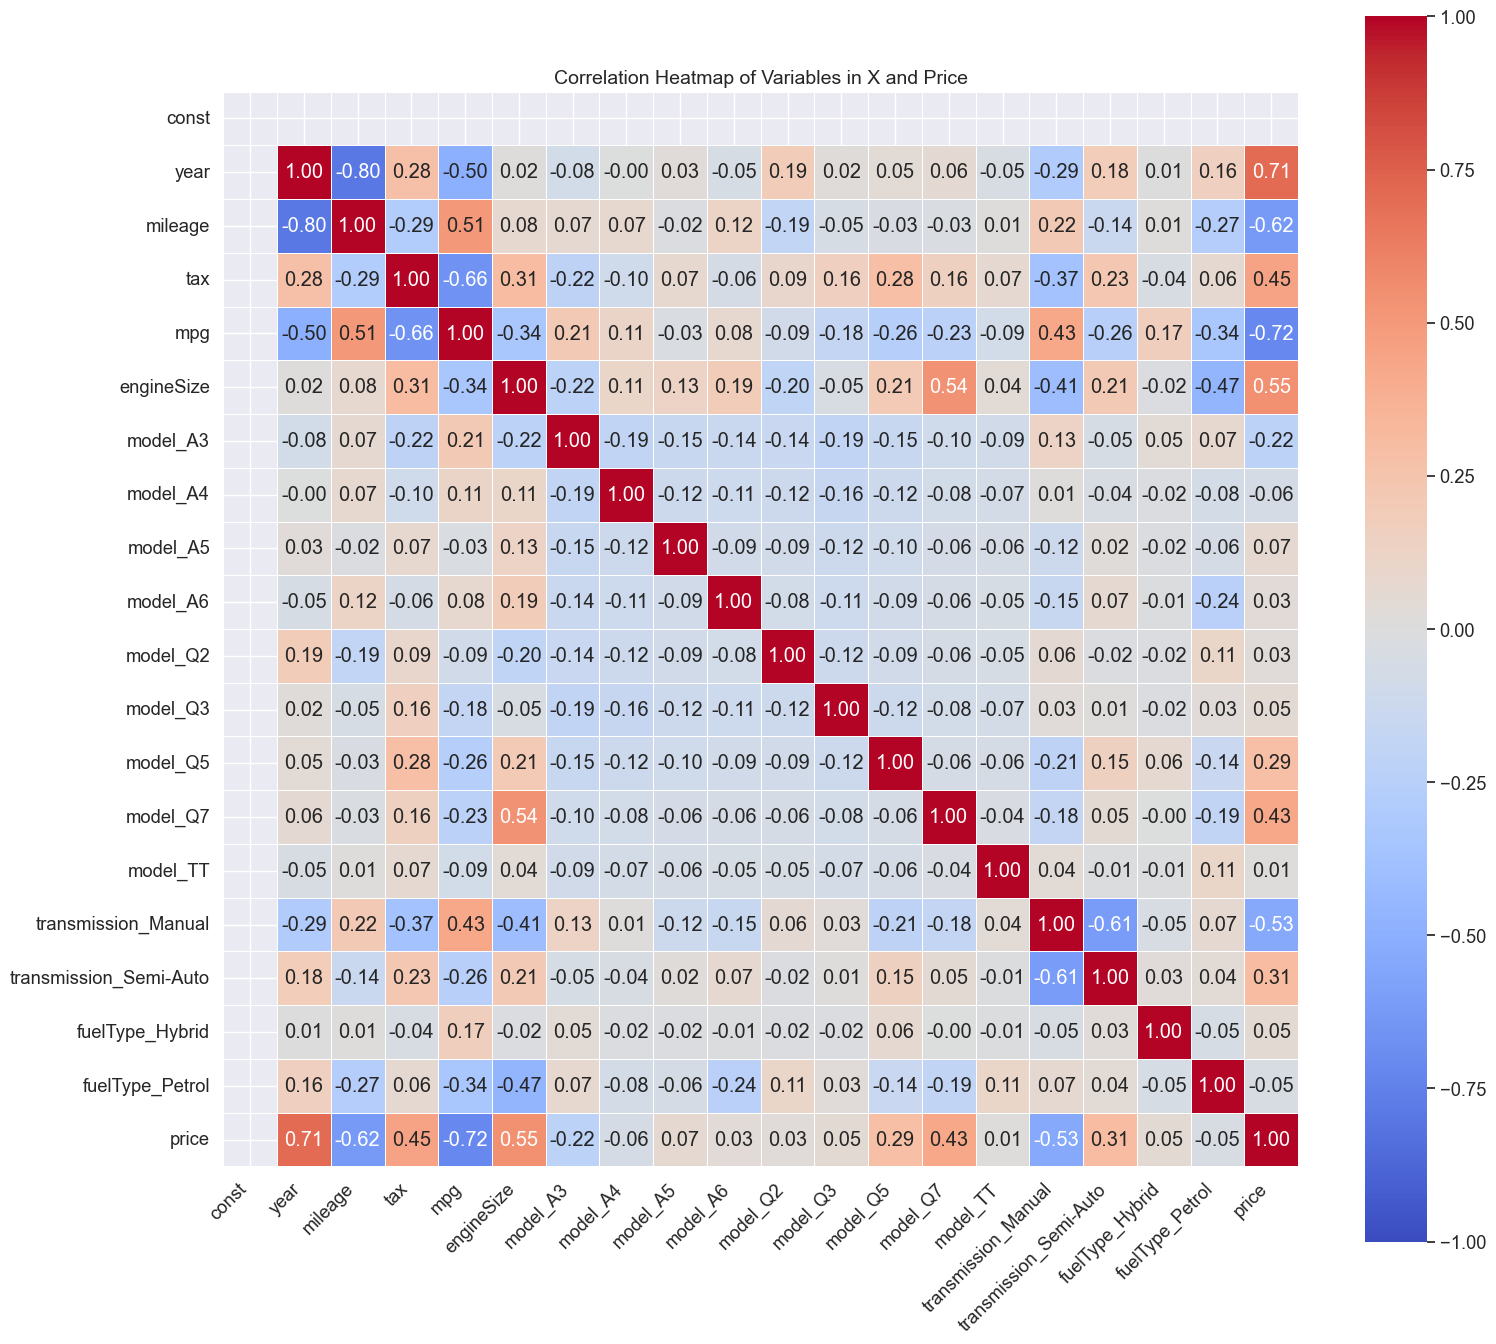

In [450]:
data = pd.concat([X, y], axis=1)

# Tính ma trận tương quan
correlation_matrix = data.corr()

# Tạo heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Variables in X and Price', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Price')

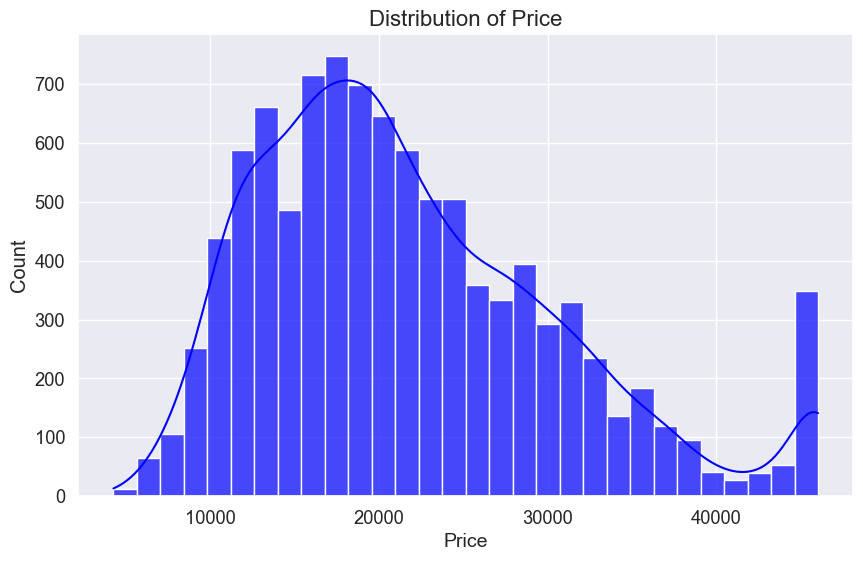

In [451]:
### Vẽ phân phối của biến price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Price', fontsize=16)
plt.xlabel('Price', fontsize=14)

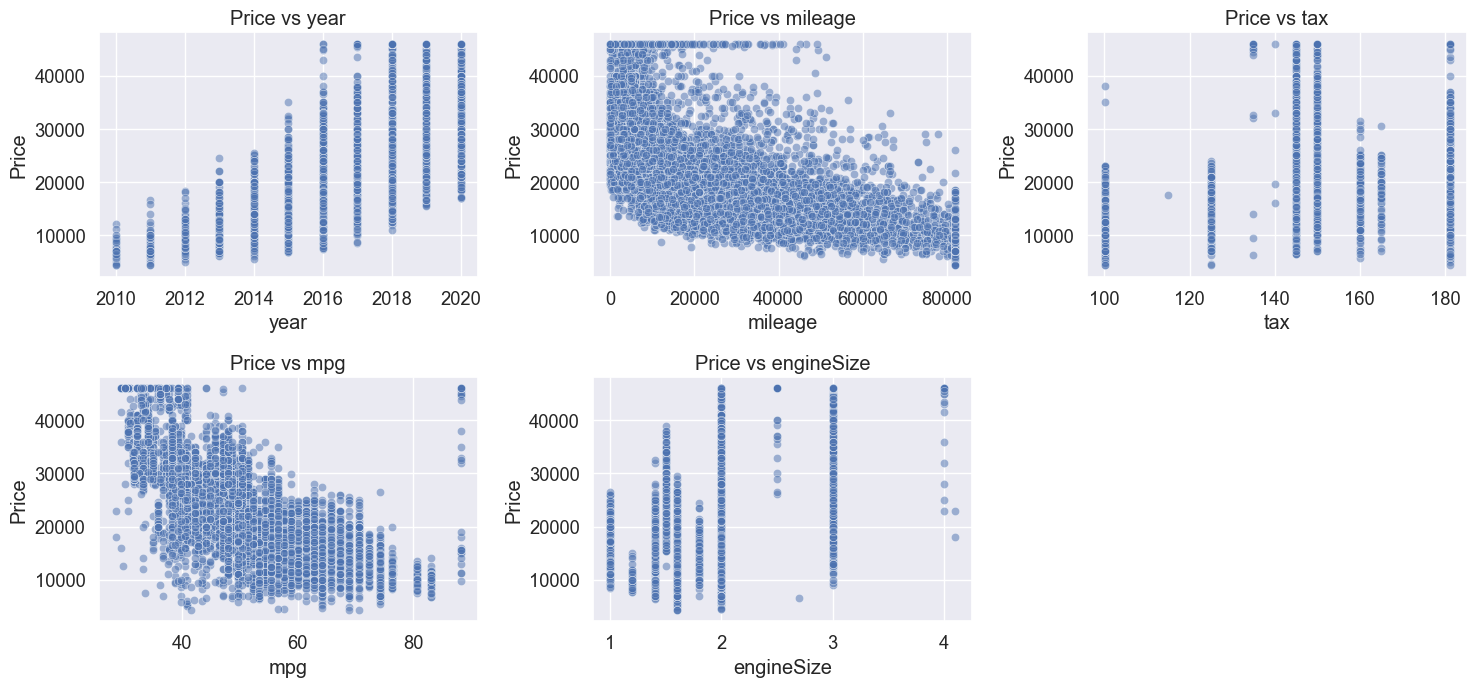

In [452]:
data = pd.concat([X, y], axis=1)
numerical_vars = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
sns.set(font_scale=1.2)
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=var, y='price', data=data, alpha=0.5)
    plt.title(f'Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [453]:
X['year_mileage'] = X['year'] * X['mileage']
X['mpg_squared'] = X['mpg'] ** 2
X['tax_mpg'] = X['tax'] * X['mpg']
X['tax_cubed'] = X['tax'] ** 3
X.drop(columns=['fuelType_Petrol'], inplace=True)
y = np.log1p(df['price'])
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     6523.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:51:16   Log-Likelihood:                 8061.9
No. Observations:               10004   AIC:                        -1.608e+04
Df Residuals:                    9982   BIC:                        -1.592e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -141

In [454]:
reset_result = reset_ramsey(model, degree=2)
print(reset_result)

<F test: F=2.6543409730638583, p=0.10329910565420239, df_denom=9.98e+03, df_num=1>


### Tính VIF

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Kết quả VIF:")
print(vif_data)

Kết quả VIF:
                   Feature           VIF
0                    const  6.573576e+06
1                     year  6.056244e+00
2                  mileage  1.346938e+06
3                      tax  4.695187e+02
4                      mpg  7.638594e+02
5               engineSize  3.020562e+00
6                 model_A3  2.139455e+00
7                 model_A4  2.380259e+00
8                 model_A5  2.093566e+00
9                 model_A6  2.117087e+00
10                model_Q2  1.689474e+00
11                model_Q3  2.288486e+00
12                model_Q5  2.348481e+00
13                model_Q7  2.614988e+00
14                model_TT  1.393365e+00
15     transmission_Manual  2.190370e+00
16  transmission_Semi-Auto  1.649586e+00
17         fuelType_Hybrid  1.305225e+00
18            year_mileage  1.345083e+06
19             mpg_squared  1.895915e+02
20                 tax_mpg  1.538389e+02
21               tax_cubed  9.762737e+01


### Kiểm định F-test xem các biến mới thêm vào có ý nghĩa không

In [456]:
add_co = ['year_mileage','mpg_squared', 'tax_mpg','tax_cubed']
base_co = ['mileage', 'tax', 'mpg', 'engineSize', 'year','model_A3', 'model_Q3', 'model_A4', 'model_A5', 'model_Q5', 'model_Q2', 'model_A6', 'model_Q7', 'model_TT','fuelType_Hybrid','transmission_Manual','transmission_Semi-Auto']

mses = {}
model_1 = sm.OLS(y, X).fit()
r_full = model_1.rsquared
for col in add_co:
    current_co = base_co + [col]  # tạo danh sách biến mới
    x = X[current_co]
    y = np.log1p(df['price'])
    # y = df['price']

    model = sm.OLS(y, x).fit()

    n = model.nobs
    k = int(model.df_model + 1)  # df_model không tính hệ số chặn, nên cần +1
    r_res = model.rsquared

    # Tính F-statistic kiểm định biến mới có cải thiện mô hình không
    Fstat = ((r_res - r_full) / 1) / ((1 - r_res) / (n - k))
    f_critical = f_dist.ppf(0.95, 1, n - k)  # chỉ thêm 1 biến nên bậc tự do numerator = 1

    if Fstat > f_critical:
        print("Variable", col, "is significant")
    else:
        print("Variable", col, "is not significant")

    # MSE của mô hình mới
    y_pred = model.predict(x)
    mse = ((y - y_pred) ** 2).mean()
    mses[col] = mse

Variable year_mileage is significant
Variable mpg_squared is significant
Variable tax_mpg is significant
Variable tax_cubed is significant


### Tìm và xử lí các outlier residual points

In [457]:
influence = OLSInfluence(model)
standardized_residuals = influence.resid_studentized_internal
cook_distance = influence.cooks_distance[0]

# Standardised residuals 
indices_ri_gt_2 = X.index[np.abs(standardized_residuals) > 2]
indices_ri_gt_3 = X.index[np.abs(standardized_residuals) > 3]

data_ri = data.loc[indices_ri_gt_2]
data_ri = data.loc[indices_ri_gt_3]

print("Data of observations with |ri| > 2:")
print(data_ri)
print("\nData of observations with |ri| > 3:")
print(data_ri)

Data of observations with |ri| > 2:
       const    year     mileage         tax   mpg  engineSize  model_A3  \
92       1.0  2016.0  24744.0000  125.000000  56.5         3.0       0.0   
137      1.0  2016.0  11863.0000  160.000000  50.4         2.0       0.0   
172      1.0  2013.0  31169.0000  145.000000  49.6         1.8       0.0   
173      1.0  2013.0  42011.0000  145.000000  47.1         2.0       0.0   
252      1.0  2014.0  10534.0000  100.017608  56.5         1.2       1.0   
...      ...     ...         ...         ...   ...         ...       ...   
10453    1.0  2010.0  81913.4209  181.106867  41.5         2.0       0.0   
10498    1.0  2010.0  68493.0000  125.000000  51.4         1.4       1.0   
10553    1.0  2011.0  81913.4209  125.000000  56.5         2.0       1.0   
10631    1.0  2012.0  24693.0000  165.000000  51.4         2.0       0.0   
10651    1.0  2011.0  32300.0000  181.106867  39.2         2.0       1.0   

       model_A4  model_A5  model_A6  model_Q2  mode

### Vẽ biểu đồ residual vs fitted values

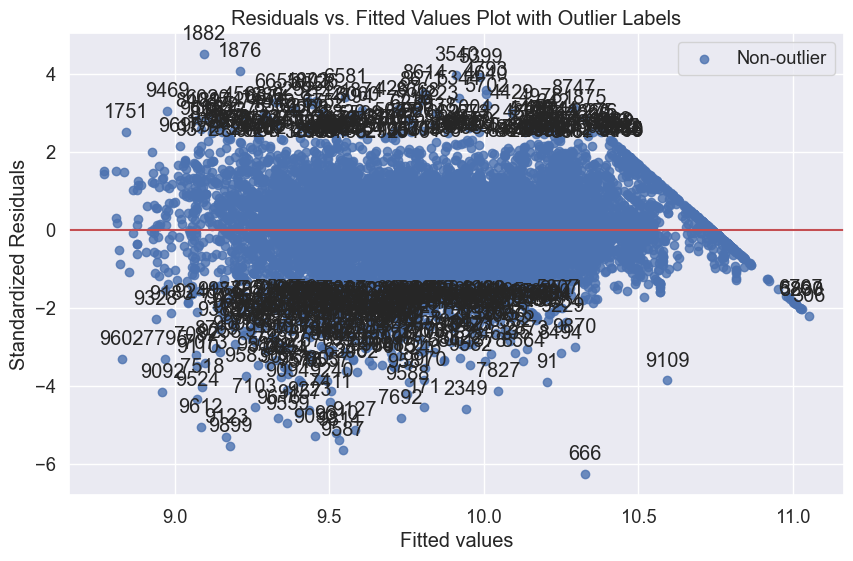

In [458]:
# Chuyển fitted values và residuals thành numpy array để tránh lỗi chỉ số
fitted = model.fittedvalues.values
standardized_residuals = influence.resid_studentized_internal

# Vẽ đồ thị Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
plt.scatter(fitted, standardized_residuals, alpha=0.8, label='Non-outlier')

# Duyệt qua các residuals chuẩn hóa để đánh dấu các outliers
for i, txt in enumerate(standardized_residuals):
    if abs(txt) > 2:  # Threshold cho outliers
        plt.annotate(i, (fitted[i], txt), textcoords="offset points", xytext=(0,10), ha='center', zorder=5)

# Thêm các thành phần vào biểu đồ
plt.xlabel('Fitted values')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs. Fitted Values Plot with Outlier Labels')
plt.axhline(y=0, color='r', linestyle='-')  # Dòng ngang tại 0 cho residuals
plt.legend()
plt.show()

### Loại bỏ các điểm outliers dựa trên standardized residuals

In [459]:
non_outliers = np.abs(standardized_residuals) <= 2
data_cleaned = data[non_outliers]
X_cleaned = X[non_outliers]
y_cleaned = y[non_outliers]

### Xây dựng và fit mô hình OLS mới

In [460]:
# Thêm hằng số (intercept) vào X_cleaned
X_cleaned = sm.add_constant(X_cleaned)
model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()
print(model_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     7176.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:51:20   Log-Likelihood:                 8701.7
No. Observations:                9513   AIC:                        -1.736e+04
Df Residuals:                    9491   BIC:                        -1.720e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -120

### Chạy lại mô hình

In [461]:
# Sau khi làm sạch dữ liệu
non_outliers = np.abs(standardized_residuals) <= 2
data_cleaned = data[non_outliers].reset_index(drop=True)  # Đặt lại chỉ số
X_cleaned = X[non_outliers].reset_index(drop=True)
y_cleaned = y[non_outliers].reset_index(drop=True)

X_cleaned = sm.add_constant(X_cleaned)
model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()

### Vẽ lại biểu đồ để kiểm tra còn outlier không

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


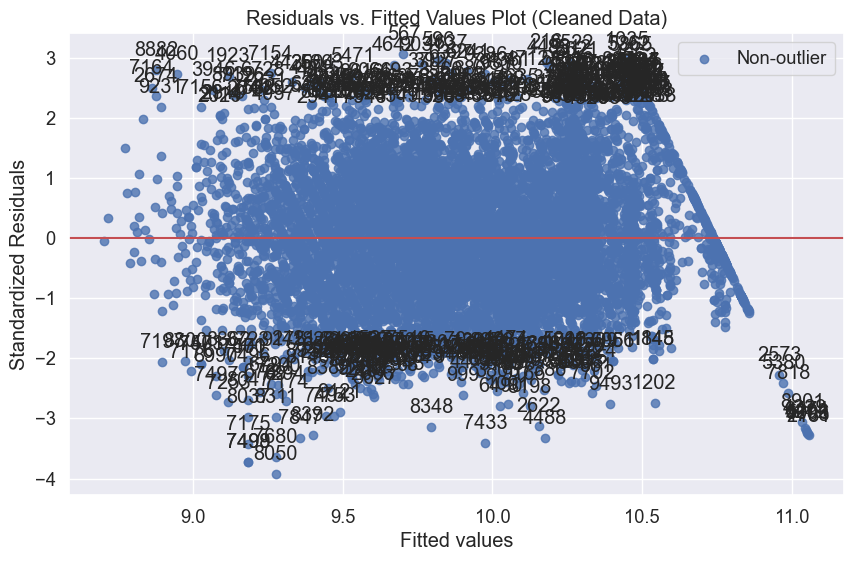

In [462]:
# Tính lại residuals và fitted values
influence_cleaned = OLSInfluence(model_cleaned)
standardized_residuals_cleaned = influence_cleaned.resid_studentized_internal
fitted_cleaned = model_cleaned.fittedvalues

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(fitted_cleaned, standardized_residuals_cleaned, alpha=0.8, label='Non-outlier')
for i, txt in enumerate(standardized_residuals_cleaned):
    if abs(txt) > 2:
        plt.annotate(i, (fitted_cleaned[i], txt), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('Fitted values')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs. Fitted Values Plot (Cleaned Data)')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.show()

### Tính Cook's Distance

In [463]:
print("\nCook's Distance:")
print(cook_distance)
a = X.index[np.abs(cook_distance) > 1]
print(np.sum(cook_distance > 1))


Cook's Distance:
0        0.000117
1        0.000045
2        0.000057
3        0.000054
4        0.000045
           ...   
10663    0.000046
10664    0.000060
10665    0.000062
10666    0.000140
10667    0.000172
Length: 10004, dtype: float64
0


### Vẽ biểu đồ Cook's Distance

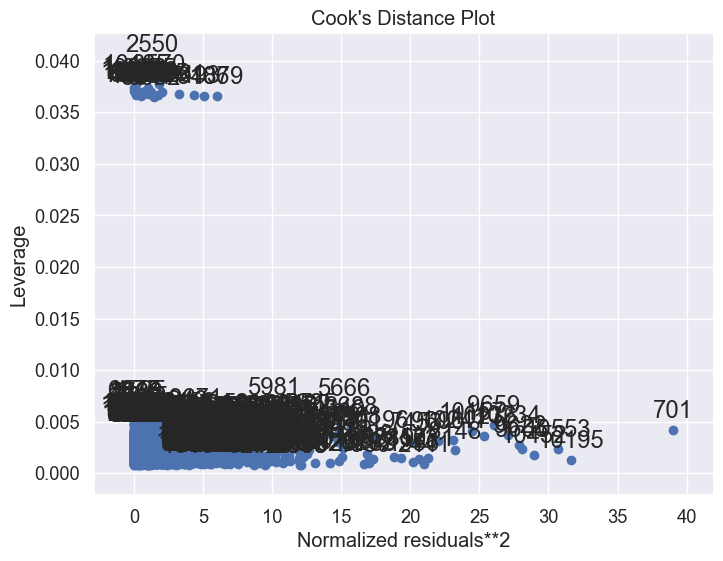

In [464]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_leverage_resid2(model, ax=ax)
plt.title("Cook's Distance Plot")
plt.show()

### Loại bỏ điểm 701 và so sánh mô hình ban đầu với mô hình khi đã loại bỏ điểm 701

In [465]:
# Mô hình với tất cả dữ liệu
model = sm.OLS(y, X).fit()

# Mô hình loại bỏ 701
data_dropped = data.drop(index=701)
X_dropped = X.drop(index=701)
y_dropped = y.drop(index=701)
model_dropped = sm.OLS(y_dropped, X_dropped).fit()

In [466]:
print(model.summary())
print(model_dropped.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     6523.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        00:51:27   Log-Likelihood:                 8061.9
No. Observations:               10004   AIC:                        -1.608e+04
Df Residuals:                    9982   BIC:                        -1.592e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -141

### => Chọn mô hình đã loại bỏ điểm 701

### Normality of residuals

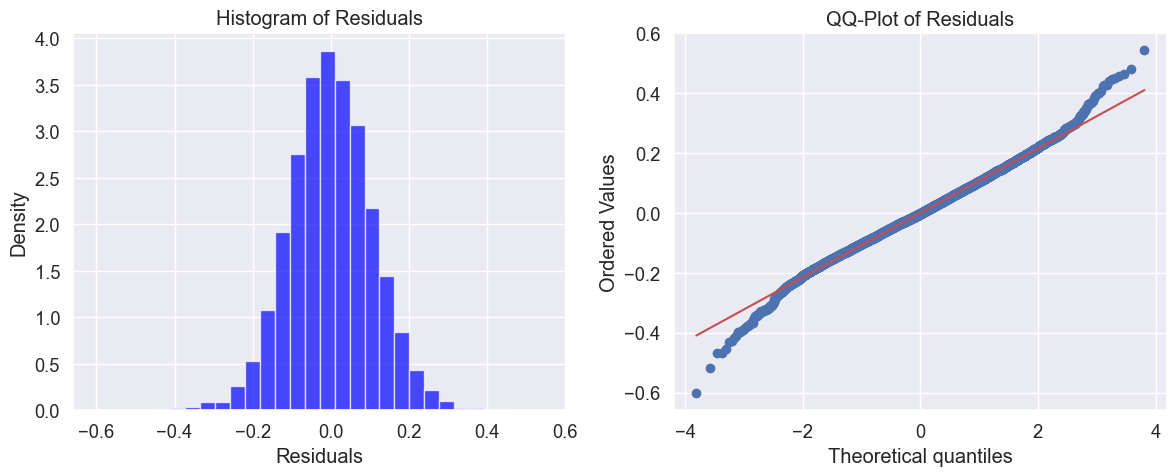

Shapiro-Wilk Test: Statistic = 0.9957, p-value = 1.5135e-16
Phần dư không tuân theo phân phối chuẩn (p-value < 0.05)


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10003.
  res = hypotest_fun_out(*samples, **kwds)


In [467]:
# Lấy phần dư từ mô hình hiện tại
residuals = model_dropped.resid

# Bước 1: Vẽ histogram và QQ-plot để kiểm tra trực quan
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')

# QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals')
plt.tight_layout()
plt.show()

# Bước 2: Kiểm định Shapiro-Wilk để kiểm tra tính chuẩn
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4e}")
if shapiro_p < 0.05:
    print("Phần dư không tuân theo phân phối chuẩn (p-value < 0.05)")
else:
    print("Phần dư có thể tuân theo phân phối chuẩn (p-value >= 0.05)")